In [ ]:
## Assumptions

# Spray is effictive within the same season
#

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [201]:
train = pd.read_csv('full_train.csv')
spray = pd.read_csv('feat_spray.csv')


In [202]:
train['Year'] = train['Date'].apply(lambda x: x[:4])

In [203]:
train.Year.value_counts()

2007    2775
2013    2012
2009    1893
2011    1773
Name: Year, dtype: int64

In [204]:
spray_train = train[(train['Year'] == '2013')]

In [261]:
train_2013_T074 = spray_train[spray_train['Trap'] == 'T074']
#train_2013_T074



In [154]:
spray.shape

(14835, 5)

In [155]:
#spray[spray.duplicated(['Year', 'Latitude', 'Longitude'])]

In [252]:
# Distance function between 2 points
def distance(lat1, long1, lat2, long2):
    return np.sqrt((lat1 - lat2)**2 + (long1-long2)**2)

# Closest station to each trap
def distance_spray(lat1 , long1,lat2, long2):
    #spray radius = .0485
    radius = .001
    if distance(lat1, long1, lat2, long2) < radius:
        return True
    else:
        return False

In [157]:
#spray_train[spray_train['Trap'] == 'T074']

In [158]:
# Identify which sprays were close to this trap, at location 41.8222536, -87.666343
spray['sprayed'] = spray[spray['Year'] == 2013].apply(lambda x: distance_spray(x['Latitude'],
                                                                 x['Longitude'],
                                                                 41.822536,
                                                                 -87.666343), axis = 1)

In [159]:
spray[(spray['sprayed'] == True)].shape

(12, 6)

In [160]:
## The day that trap T074 was sprayed
spray[(spray['sprayed'] == True)].head(30)

,Date,Time,Latitude,Longitude,Year,sprayed
11839,2013-08-29,9:47:57 PM,41.784580,-87.696015,2013,True
11840,2013-08-29,9:48:07 PM,41.785240,-87.696048,2013,True
11841,2013-08-29,9:48:47 PM,41.785785,-87.697245,2013,True
11842,2013-08-29,9:48:57 PM,41.785348,-87.697208,2013,True
11892,2013-08-29,9:57:47 PM,41.784327,-87.696007,2013,True
11893,2013-08-29,9:57:57 PM,41.784973,-87.696015,2013,True
11894,2013-08-29,9:58:07 PM,41.785630,-87.696028,2013,True
11895,2013-08-29,9:58:37 PM,41.785960,-87.694820,2013,True
11896,2013-08-29,9:58:47 PM,41.785407,-87.694817,2013,True
11897,2013-08-29,9:58:57 PM,41.784823,-87.694803,2013,True


In [216]:
temp = train[(train['Trap'] == 'T074') & (train['Year'] == '2013')].sort_values(by=['Date'])

In [229]:
temp = temp[['Date','NumMosquitos']]
temp['index'] = range(1, len(temp) + 1)
temp[['index', 'NumMosquitos','Date']]

,index,NumMosquitos,Date
6315,1,1,2013-06-07
6308,2,2,2013-06-07
6408,3,5,2013-06-21
6395,4,1,2013-06-21
3426,5,3,2013-06-28
3425,6,9,2013-06-28
6572,7,3,2013-07-08
6571,8,1,2013-07-08
2347,9,26,2013-07-12
2361,10,50,2013-07-12


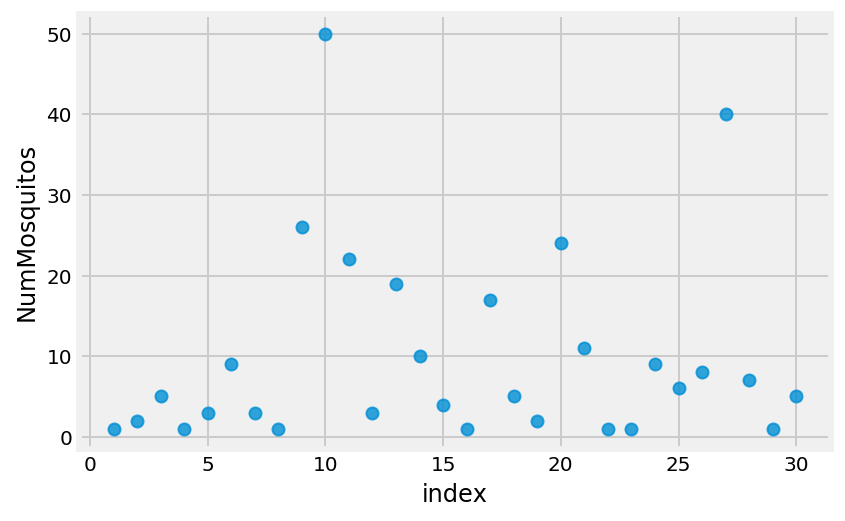

In [224]:
sns.regplot(x = 'index', y = 'NumMosquitos', data = temp, fit_reg = False)

In [228]:
#train[(train['Trap'] == 'T074') & (train['Year'] == '2013')].sort_values(by=['Date'])['Date']

In [230]:
spray2 = pd.read_csv('feat_spray.csv')

In [258]:
spray2['sprayed'] = spray[spray['Year'] == 2013].apply(lambda x: distance_spray(x['Latitude'],
                                                                 x['Longitude'],
                                                                 41.99772833,
                                                                 -87.76753167), axis = 1)

In [259]:
#spray2[spray2['Year'] == 2013]

In [260]:
spray2[(spray2['sprayed'] == True)].head()

,Date,Time,Latitude,Longitude,Year,sprayed
2209,2013-07-17,7:45:45 PM,41.997728,-87.767532,2013,True
2210,2013-07-17,7:45:55 PM,41.997990,-87.768085,2013,True
4322,2013-07-17,8:17:12 PM,41.998160,-87.767378,2013,True
4323,2013-07-17,8:17:22 PM,41.998000,-87.767735,2013,True
4385,2013-07-17,8:31:12 PM,41.998187,-87.767298,2013,True


In [262]:
spray_train['near']

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Rain,latitude,longitude,Year
75,2013-08-22,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX PIPIENS/RESTUANS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
76,2013-08-22,"5000 South Union Avenue, Chicago, IL 60609, USA",CULEX PIPIENS/RESTUANS,50,S UNION AVE,T082,"5000 S UNION AVE, Chicago, IL",41.803423,-87.642984,8,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
77,2013-08-22,"6700 South Kedzie Avenue, Chicago, IL 60629, USA",CULEX PIPIENS,67,S KEDZIE AVE,T066,"6700 S KEDZIE AVE, Chicago, IL",41.771660,-87.703047,8,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
78,2013-08-22,"6700 South Kedzie Avenue, Chicago, IL 60629, USA",CULEX RESTUANS,67,S KEDZIE AVE,T066,"6700 S KEDZIE AVE, Chicago, IL",41.771660,-87.703047,8,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
79,2013-08-22,"2200 West 51st Street, Chicago, IL 60609, USA",CULEX RESTUANS,22,W 51ST ST,T061,"2200 W 51ST ST, Chicago, IL",41.801179,-87.679447,8,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
80,2013-08-22,"2500 South Millard Avenue, Chicago, IL 60623, USA",CULEX RESTUANS,25,S MILLARD AVE,T152,"2500 S MILLARD AVE, Chicago, IL",41.846075,-87.716277,9,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
81,2013-08-22,"1000 North Central Park Avenue, Chicago, IL 60...",CULEX PIPIENS,10,N CENTRAL PARK DR,T030,"1000 N CENTRAL PARK DR, Chicago, IL",41.899230,-87.716788,9,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
82,2013-08-22,"1100 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,11,S CALIFORNIA,T047,"1100 S CALIFORNIA, Chicago, IL",41.868142,-87.696269,9,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
83,2013-08-22,"4500 North Campbell Avenue, Chicago, IL 60625,...",CULEX PIPIENS/RESTUANS,45,N CAMPBELL AVE,T220,"4500 N CAMPBELL AVE, Chicago, IL",41.963976,-87.691810,9,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
84,2013-08-22,"3900 North Springfield Avenue, Chicago, IL 606...",CULEX PIPIENS,39,N SPRINGFIELD AVE,T228,"3900 N SPRINGFIELD AVE, Chicago, IL",41.951866,-87.725057,8,...,0.36,29.42,30.05,2.5,24.0,7.0,1.0,41.786,-87.752,2013
